In [5]:
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


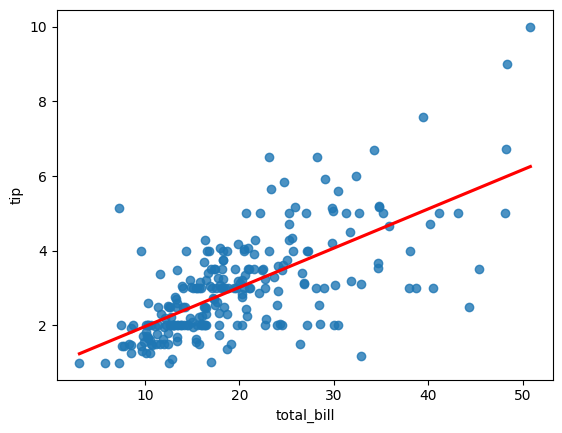

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 : 팁스
tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips, ci=None, line_kws={"color": "red"})
print()

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

a_values = np.linspace(0, 0.5, 100)
b_values = np.linspace(0, 5, 100)

best_a, best_b = None, None
min_error = float("inf")

for a in a_values:
    for b in b_values:
        y_hat = a * X + b

        # error = np.sum(np.abs(y - y_hat)) # error 계산 = 오차의 합
        error = np.mean(np.abs(y - y_hat) ** 2)
        if error < min_error:
            min_error = error
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 '오차의 합':", min_error)


최적 기울기 a: 0.10606060606060606
최적 절편 b: 0.9090909090909091
최소 '오차의 합': 1.036191056146412


Epoch 0, MSE=3.3588, a=0.0860, b=0.4940
Epoch 100, MSE=1.0653, a=0.1226, b=0.5026
Epoch 200, MSE=1.0643, a=0.1223, b=0.5095
Epoch 300, MSE=1.0634, a=0.1220, b=0.5163
Epoch 400, MSE=1.0625, a=0.1217, b=0.5230
Epoch 500, MSE=1.0616, a=0.1215, b=0.5296
Epoch 600, MSE=1.0608, a=0.1212, b=0.5361
Epoch 700, MSE=1.0600, a=0.1209, b=0.5425
Epoch 800, MSE=1.0592, a=0.1207, b=0.5488
Epoch 900, MSE=1.0584, a=0.1204, b=0.5549
Epoch 1000, MSE=1.0577, a=0.1201, b=0.5610
Epoch 1100, MSE=1.0570, a=0.1199, b=0.5670
Epoch 1200, MSE=1.0563, a=0.1196, b=0.5728
Epoch 1300, MSE=1.0556, a=0.1194, b=0.5786
Epoch 1400, MSE=1.0550, a=0.1192, b=0.5843
Epoch 1500, MSE=1.0543, a=0.1189, b=0.5899
Epoch 1600, MSE=1.0537, a=0.1187, b=0.5954
Epoch 1700, MSE=1.0532, a=0.1185, b=0.6008
Epoch 1800, MSE=1.0526, a=0.1182, b=0.6061
Epoch 1900, MSE=1.0520, a=0.1180, b=0.6113
Epoch 2000, MSE=1.0515, a=0.1178, b=0.6164
Epoch 2100, MSE=1.0510, a=0.1176, b=0.6215
Epoch 2200, MSE=1.0505, a=0.1174, b=0.6264
Epoch 2300, MSE=1.0500,

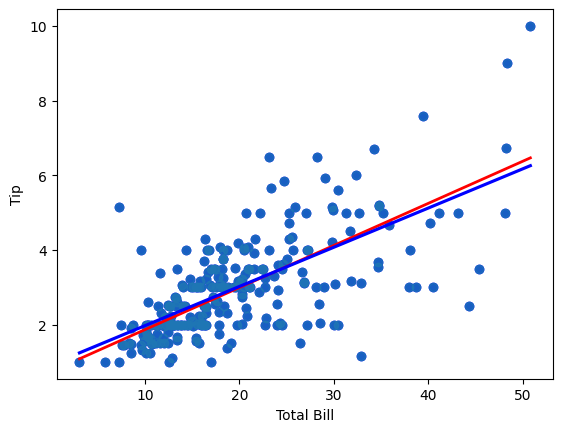

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터 (Seaborn tips dataset)
tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

# 파라미터 초기화 (a: 기울기, b: 절편)
a = np.random.randn()
b = np.random.randn()

lr = 0.001
epochs = 5000

for epoch in range(epochs):
    y_hat = a * X + b

    error = y_hat - y

    grad_a = np.mean(error * X)
    grad_b = np.mean(error)

    a -= lr * grad_a
    b -= lr * grad_b

    # 학습 상황 출력
    if epoch % 100 == 0:
        mse = np.mean((y - y_hat)**2)
        print(f"Epoch {epoch}, MSE={mse:.4f}, a={a:.4f}, b={b:.4f}")


# 학습된 직선 그리기
plt.scatter(X, y, color="blue", label="Data")
x_line = np.linspace(X.min(), X.max(), 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color="red", linewidth=2, label="Batch GD Line")
sns.regplot(x="total_bill", y="tip", data=tips, ci=None, line_kws={"color": "blue"})
plt.xlabel("Total Bill")
plt.ylabel("Tip")
print()
